<a href="https://colab.research.google.com/github/Advait177013/ML_CSE4020/blob/main/chall%2520task%25202/Challenging_Task_2_20BCE1143.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
#Questions below
#Advait Deochakke
#20BCE1143

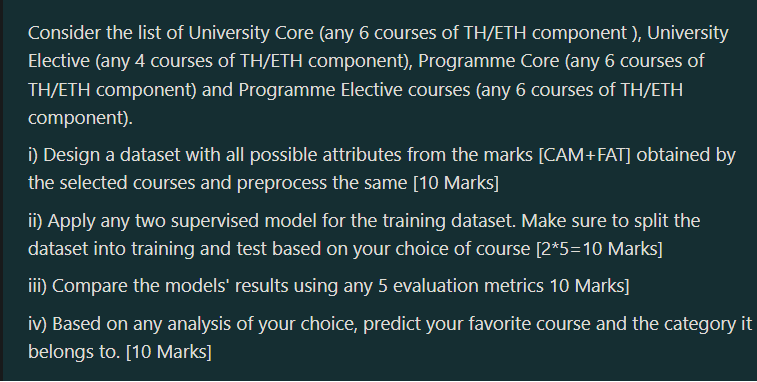

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
url = 'https://raw.githubusercontent.com/Advait177013/ML_CSE4020/main/chall%20task%202/dataset.csv'
df = pd.read_csv(url)
df

,Name,Type,CAT 1,CAT 2,FAT
0,DLD,PC,14.97,14.89,35.75
1,CAO,PC,13.98,13.52,40.14
2,DBMS,PC,10.43,12.49,41.54
3,OS,PC,12.10,14.15,48.58
4,DSA,PC,10.08,13.51,42.18
5,SFE,PC,12.99,10.96,36.59
6,AI,PE,14.10,11.52,46.01
7,Game,PE,10.39,12.46,47.85
8,CyberSec,PE,13.21,12.58,48.82
9,HPC,PE,10.17,14.00,49.89


Randomly Generated Dataset, as We haven't done 6 UE or 6 PE

(Minimum marks set as 4 and 8 for cat and fat respectively)


In [178]:
#for the dataset, some data may have inherently different magnitudes of value compared to other data
#so we scale with preprocessing
X = df[['CAT 1', 'CAT 2', 'FAT']]
from sklearn import preprocessing
scalerX = preprocessing.StandardScaler().fit(X)
X = scalerX.transform(X)

y = df[['Type']]
#y = y.apply(lambda col: pd.factorize(col)[0]) #preprocessing from string to numeric, maintain order

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [179]:
#applying Models - knn 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0, n_init=100).fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
from sklearn.neighbors import KNeighborsClassifier
for i in range (1, 7):
  knnclassifier = KNeighborsClassifier(n_neighbors=i)
  knnclassifier.fit(X_train, y_train)
  y_pred_knn = knnclassifier.predict(X_test)
  from sklearn.metrics import accuracy_score
  print("for nearest neighbours "+str(i)+" : Accuracy Score is "+str(accuracy_score(y_test, y_pred_knn)))

for nearest neighbours 1 : Accuracy Score is 0.8
for nearest neighbours 2 : Accuracy Score is 0.6
for nearest neighbours 3 : Accuracy Score is 0.8
for nearest neighbours 4 : Accuracy Score is 0.8
for nearest neighbours 5 : Accuracy Score is 0.6
for nearest neighbours 6 : Accuracy Score is 0.4


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

for decision tree : Accuracy Score is 0.8


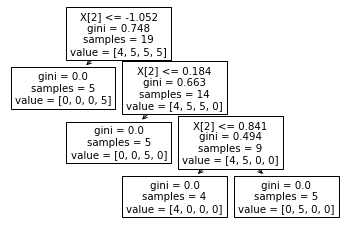

In [180]:
#applying Models - decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, y_train)
tree.plot_tree(dtclassifier)
y_pred_dt = dtclassifier.predict(X_test)
print("for decision tree : Accuracy Score is "+str(accuracy_score(y_test, y_pred_dt)))


In [181]:
#applying Models - SVM
from sklearn import svm
svmclassifier = svm.SVC()
svmclassifier.fit(X_train, y_train)
y_pred_svm = svmclassifier.predict(X_test)
print("for decision tree : Accuracy Score is "+str(accuracy_score(y_test, y_pred_svm)))

for decision tree : Accuracy Score is 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [182]:
#comparing results based on eval metrics
print("For the classifiers\n\tKNN\tDT\tSVM")

print("Acc\t"+str(accuracy_score(y_test, y_pred_knn))+"\t"+str(accuracy_score(y_test, y_pred_dt))+"\t"+str(accuracy_score(y_test, y_pred_svm)))

from sklearn.metrics import balanced_accuracy_score
print("BalAcc\t"+str(round(balanced_accuracy_score(y_test, y_pred_knn), 2))+"\t"+str(round(balanced_accuracy_score(y_test, y_pred_dt), 2))+"\t"+str(round(balanced_accuracy_score(y_test, y_pred_svm), 2)))

from sklearn.metrics import f1_score
print("F1\t"+str(round(f1_score(y_test, y_pred_knn, average='macro'), 2))+"\t"+str(round(f1_score(y_test, y_pred_dt, average='macro'), 2))+"\t"+str(round(f1_score(y_test, y_pred_svm, average='macro'), 2)))

from sklearn.metrics import jaccard_score
print("Jaccard\t"+str(round(jaccard_score(y_test, y_pred_knn, average='macro'), 2))+"\t"+str(round(jaccard_score(y_test, y_pred_dt, average='macro'), 2))+"\t"+str(round(jaccard_score(y_test, y_pred_svm, average='macro'), 2)))

For the classifiers
	KNN	DT	SVM
Acc	0.4	0.8	0.6
BalAcc	0.38	0.88	0.75
F1	0.29	0.83	0.62
Jaccard	0.21	0.75	0.58


In [183]:
#confusion matrix
from sklearn.metrics import multilabel_confusion_matrix

mcm_knn = multilabel_confusion_matrix(y_test, y_pred_dt,labels=["PC", "PE", "UC", "UE"])

tn_knn = mcm_knn[:, 0, 0]
tp_knn = mcm_knn[:, 1, 1]
fn_knn = mcm_knn[:, 1, 0]
fp_knn = mcm_knn[:, 0, 1]

mcm_dt = multilabel_confusion_matrix(y_test, y_pred_svm,labels=["PC", "PE", "UC", "UE"])

tn_dt = mcm_dt[:, 0, 0]
tp_dt = mcm_dt[:, 1, 1]
fn_dt = mcm_dt[:, 1, 0]
fp_dt = mcm_dt[:, 0, 1]

mcm_svm = multilabel_confusion_matrix(y_test, y_pred_svm,labels=["PC", "PE", "UC", "UE"])

tn_svm = mcm_svm[:, 0, 0]
tp_svm = mcm_svm[:, 1, 1]
fn_svm = mcm_svm[:, 1, 0]
fp_svm = mcm_svm[:, 0, 1]

print("For the classifiers\n\tKNN\tDT\tSVM")

print("TP\t"+str(sum(tp_knn))+"\t"+str(sum(tp_dt))+"\t"+str(sum(tp_svm))+"\t")
print("Tn\t"+str(sum(tn_knn))+"\t"+str(sum(tn_dt))+"\t"+str(sum(tn_svm))+"\t")
print("fP\t"+str(sum(fp_knn))+"\t"+str(sum(fp_dt))+"\t"+str(sum(fp_svm))+"\t")
print("fn\t"+str(sum(fn_knn))+"\t"+str(sum(fn_dt))+"\t"+str(sum(fn_svm))+"\t")

For the classifiers
	KNN	DT	SVM
TP	4	3	3	
Tn	14	13	13	
fP	1	2	2	
fn	1	2	2	


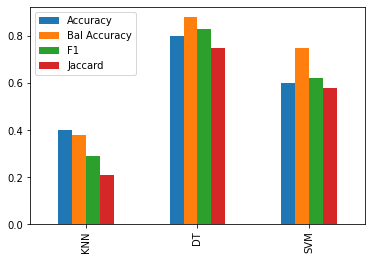

In [192]:
#plotting the accuracy scores
accu_data = [0.4, 0.8, 0.6]
baccu_data = [0.38,	0.88,	0.75]
F1_data = [0.29,	0.83,	0.62]
Jacc_data = [0.21,	0.75,	0.58]

index = ['KNN', 'DT', 'SVM']
df_metrics = pd.DataFrame({'Accuracy': accu_data, 'Bal Accuracy': baccu_data,'F1': F1_data,'Jaccard': Jacc_data}, index=index)
df_metrics.plot.bar()

Text(0.5, 1.0, 'perfect pred')

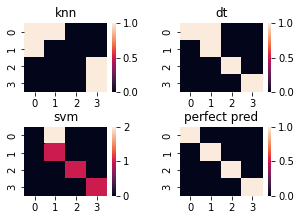

In [188]:
#confusion matrix graph
from sklearn.metrics import confusion_matrix
cf_knn = confusion_matrix(y_test, y_pred_knn)
cf_dt = confusion_matrix(y_test, y_pred_dt)
cf_svm = confusion_matrix(y_test, y_pred_svm)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, wspace=0.5, hspace=0.5)

import seaborn as sb
plt.subplot(2, 2, 1)
sb.heatmap(cf_knn)
plt.title('knn')

plt.subplot(2, 2, 2)
sb.heatmap(cf_dt)
plt.title('dt')

plt.subplot(2, 2, 3)
sb.heatmap(cf_svm)
plt.title('svm')

plt.subplot(2, 2, 4)
sb.heatmap(np.identity(4))
plt.title('perfect pred')

In [202]:
#predict fav course
#assuming it just means highest avg marks category, then maximum marks in that category?
df.groupby(['Type']).mean()

,CAT 1,CAT 2,FAT
Type,,,
PC,12.425,13.253333,40.796667
PE,12.735,12.725000,48.323333
UC,9.615,8.513333,27.515000
UE,12.165,10.695000,11.766667


In [203]:
#we can see, PE is the highest on average
df[df.FAT == max(df.FAT)]

,Name,Type,CAT 1,CAT 2,FAT
9,HPC,PE,10.17,14.0,49.89


Therefore, HPC is the favourite subject as predicted